## JPAD Executable

The JPAD library is provided with an executable JAR, which is capable of various aircraft analysis tasks. On Windows, this JAR is executed via a `.bat` command script named `JPAD.bat`.

In [1]:
!dir

 Il volume nell'unit… C non ha etichetta.
 Numero di serie del volume: 7A0B-F5A2

 Directory di C:\Users\agodemar\ADOPT_PROJECT\jpad\JPAD-Apps\JPAD_Executable

26/09/2017  18:08    <DIR>          .
26/09/2017  18:08    <DIR>          ..
26/09/2017  16:04             2 616 .classpath
26/09/2017  16:04                 7 .gitignore
26/09/2017  17:19    <DIR>          .ipynb_checkpoints
26/09/2017  16:04               380 .project
26/09/2017  16:04    <DIR>          .settings
26/09/2017  18:15    <DIR>          data
26/09/2017  16:06    <DIR>          in
26/09/2017  17:30               592 JPAD.bat
26/09/2017  16:04        30 057 987 JPAD.jar
28/09/2017  14:45    <DIR>          out
26/09/2017  16:04               177 README.txt
26/09/2017  17:30    <DIR>          runs
26/09/2017  16:06    <DIR>          src
26/09/2017  17:30    <DIR>          test
26/09/2017  18:08             2 924 Test_01.ipynb
               7 File     30 064 683 byte
              10 Directory  36 016 713 728 byte disp

In [2]:
!echo %JAVA_HOME%

C:\Program Files\Java\jdk1.8.0_144


In [3]:
!JPAD.bat


C:\Users\agodemar\ADOPT_PROJECT\jpad\JPAD-Apps\JPAD_Executable>setlocal

C:\Users\agodemar\ADOPT_PROJECT\jpad\JPAD-Apps\JPAD_Executable>set PATH=C:\Users\agodemar\Anaconda3\Library\bin;C:\Users\agodemar\Anaconda3\Library\bin;C:\Users\agodemar\Anaconda3;C:\Users\agodemar\Anaconda3\Library\mingw-w64\bin;C:\Users\agodemar\Anaconda3\Library\usr\bin;C:\Users\agodemar\Anaconda3\Library\bin;C:\Users\agodemar\Anaconda3\Scripts;C:\Users\agodemar\Anaconda3\Library\bin;C:\Program Files\Docker\Docker\Resources\bin;c:\CGAL-4.8\build\bin;c:\Qt\Qt5.6.0\5.6\msvc2015_64\bin;c:\libQGLViewer-2.6.3\QGLViewer;c:\boost_1_61_0\lib64-msvc-14.0;c:\CGAL-4.8\auxiliary\gmp\lib;c:\Users\agodemar\DEV\tcltk-86-64\bin;C:\Program Files (x86)\scala\bin;C:\Users\agodemar\AppData\Local\Julia-0.4.6\bin;C:\Program Files (x86)\Tecplot\Tecplot 360 EX 2014 R2\bin;C:\Program Files\Microsoft HPC Pack 2012\Bin\;C:\Tcl\bin;C:\Program Files\swigwin-3.0.10;C:\Program Files\gradle-2.7\bin;C:\ProgramData\Oracle\Java\javapath;C:\User

		Cruise range = 1375.9067160419193 nmi 
		First descent range = 95.44884708572283 nmi 
		Second climb range = 17.59759933335158 nmi 
		Alternate cruise range = 100.0 nmi 
		Second descent range = 38.39482262187971 nmi 
		Holding range = 0.0 nmi 
		Third descent range = 3.5867091019897543 nmi 
		Landing range = 0.4703680489050157 nmi 
		.....................................
		Take-off duration = 0.47670509563225444 min 
		Climb duration = 16.221226440395874 min 
		Cruise duration = 232.14272456678623 min 
		First descent duration = 18.99999999999997 min 
		Second climb duration = 4.9215318821559038 min 
		Alternate cruise duration = 16.982020577107875 min 
		Second descent duration = 8.999999999999971 min 
		Holding duration = 29.99999999999997 min 
		Third descent duration = 0.9666666666666117 min 
		Landing duration = 0.2357360492078726 min 
		.....................................
		Take-off used fuel = 27.61743452628439 kg 
		Climb used fuel = 627.7258121556208 kg 
		Cruise used fue

THE CHOSEN CRUISE MACH NUMBER IS NOT INSIDE THE FLIGHT ENVELOPE !
Unable to write file C:\Users\agodemar\ADOPT_PROJECT\jpad\JPAD-Apps\JPAD_Executable\out\IRON\PERFORMANCE\LANDING\TrajectoryAndSpeed_vs_GroundDistance_SI\Speed (m\s).csv
MAXIMUM TAKE-OFF MASS SURPASSED !! REDUCING PASSENGERS NUMBER TO INCREASE THE FUEL ... 
MAXIMUM TAKE-OFF MASS SURPASSED !! REDUCING PASSENGERS NUMBER TO INCREASE THE FUEL ... 


## Results
Now we can show the results saved in `./out/IRON`

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 

In [5]:
Image(url= "out/IRON/PERFORMANCE/MISSION_PROFILES/Range_Profile_IMPERIAL.png")

Now take a data file and plot

In [11]:
import xml.etree.ElementTree as et
namext = 'aircraft.xml'
infolderpath = './in/Template_Aircraft/'
inpath = infolderpath + namext

xmltree = et.parse(inpath)
xmlroot = xmltree.getroot()          # XML Root element: <runscript>

ac_id = xmlroot.find('aircraft').get('id')
outfolderpath = './out/' + ac_id + '/'
csv_path = outfolderpath + 'PERFORMANCE/MISSION_PROFILES/Range_Profile_IMPERIAL/Range_Profile_IMPERIAL.csv'
print(csv_path)

./out/IRON/PERFORMANCE/MISSION_PROFILES/Range_Profile_IMPERIAL/Range_Profile_IMPERIAL.csv


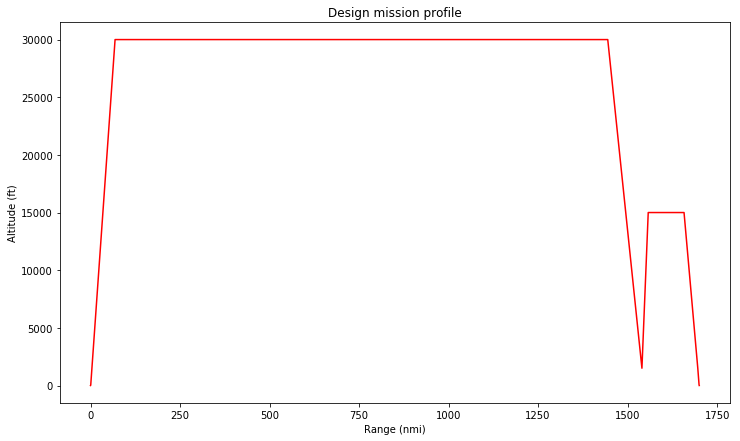

In [14]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

data = np.genfromtxt(csv_path, delimiter=',', skip_header=1,
                     skip_footer=0, names=['c1', 'c2'])

width = 12
height = 7
fig = plt.figure(figsize=(width, height))

ax1 = fig.add_subplot(111)

ax1.set_title("Design mission profile")
ax1.set_xlabel('Range (nmi)')
ax1.set_ylabel('Altitude (ft)')
ax1.plot(data['c1'], data['c2'], color='r')

plt.show()